In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [13]:
def normal(x, mu, si):
    return np.exp(-(x-mu)**2/(2*si**2))/np.sqrt(2*np.pi*si**2)

In [14]:
colors = [
    'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_grey', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gist_yerg', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'grey', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'
]

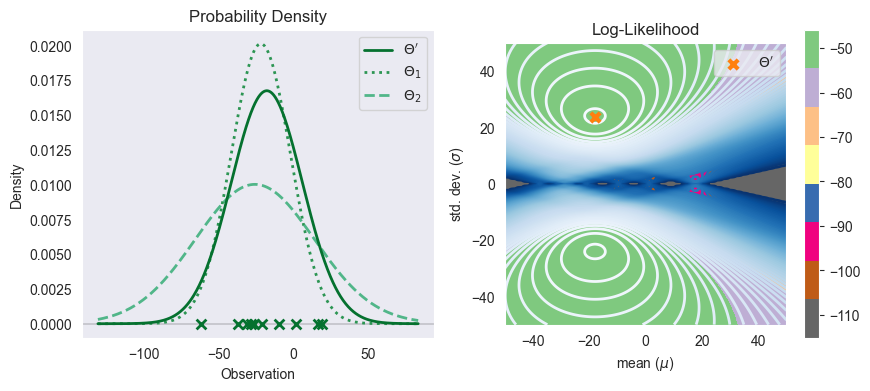

In [15]:
sns.set_palette(colors[7])
sns.set_style("darkgrid")
np.random.seed(1)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
x = np.random.normal(loc=-16 , scale=20, size=10)
y = np.random.normal(loc=0, scale=20, size=10)
lin = np.linspace(-np.std(x)*5.5, np.std(x)*3.5, 1000)
plt.scatter(x, np.zeros_like(x), zorder=0 + 20, linewidths=2, marker='x', s=50)
plt.plot(lin, normal(lin, mu=np.mean(x), si=np.std(x)), zorder=20 + 20, label=r"$\Theta'$", linewidth=2)
plt.plot(lin, normal(lin, mu=np.mean(x) - 4, si=np.std(x) - 4), linestyle=':', zorder=0 + 20, label=r"$\Theta_1$", linewidth=2)
plt.plot(lin, normal(lin, mu=np.mean(x) - 8, si=np.std(x) + 16), linestyle='--', zorder=2 + 20, label=r"$\Theta_2$", linewidth=2)
plt.xlabel('Observation')
plt.ylabel('Density')
plt.title('Probability Density')
plt.grid(False)
plt.axhline(0, color='black', linestyle='-', linewidth=.2, zorder=-20)
plt.legend()
plt.subplot(1, 2, 2)

data = x.reshape(-1, 1)  

# Define the range for mu (mean) and sigma (standard deviation)
r = 50
mu_range = np.linspace(-r, r, 200)
sigma_range = np.linspace(-r, r, 200)  

# Create a meshgrid for mu and sigma
Mu, Sigma = np.meshgrid(mu_range, sigma_range)

LogLikelihood = np.zeros(Mu.shape)

# Compute the log likelihood for each pair of mu and sigma
for i in range(Mu.shape[0]):
    for j in range(Mu.shape[1]):
        LogLikelihood[i, j] = np.sum(np.log(normal(data, Mu[i, j], Sigma[i, j]) + 1e-5))

cmap = [colors[10], colors[1]][-1]
heatmap = plt.imshow(LogLikelihood, cmap=cmap,  extent=(mu_range.min(), mu_range.max(), sigma_range.min(), sigma_range.max()))
contours = plt.contour(LogLikelihood, cmap=colors[3], levels=82,  extent=(mu_range.min(), mu_range.max(), sigma_range.min(), sigma_range.max()), linewidths=2, alpha=1)
#plt.clabel(contours, inline=False, fontsize=8)
plt.xlabel(r'mean ($\mu$)')
plt.ylabel(r'std. dev.' + r' ($\sigma$)')
plt.title('Log-Likelihood')
plt.scatter(np.mean(data), np.std(data), marker='x', s=45, color='tab:orange', linewidth=3, zorder=10, label=r"$\Theta'$")
#plt.gca().invert_yaxis()  # Reverse the y-axis
plt.colorbar(heatmap)
plt.grid(False)
plt.legend()

plt.show()